In [78]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('darkgrid')

In [79]:
# Load the CSV files
train_df = pd.read_csv(r"C:\Users\HP\Downloads\Projects\EDA_Titanic\train.csv")
test_df = pd.read_csv(r"C:\Users\HP\Downloads\Projects\EDA_Titanic\test.csv")
submission_df = pd.read_csv(r"C:\Users\HP\Downloads\Projects\EDA_Titanic\gender_submission.csv")

In [80]:
print("train shape",train_df.shape)
print("test shape",test_df.shape)

train shape (891, 12)
test shape (418, 11)


In [81]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [83]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [84]:
#Checking the missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

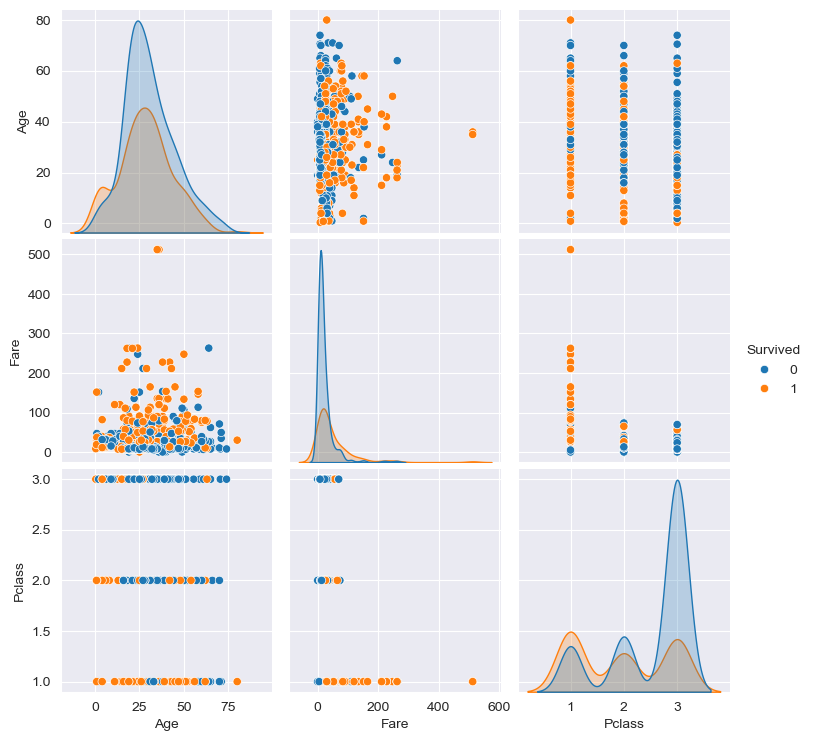

In [85]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

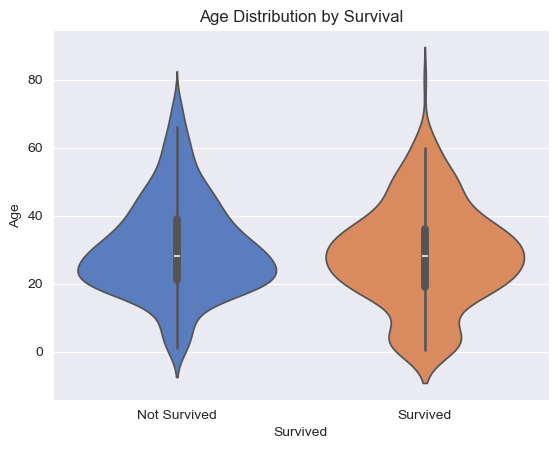

In [86]:
sns.violinplot(data=train_df, x='Survived', y='Age', palette='muted')
plt.title('Age Distribution by Survival')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

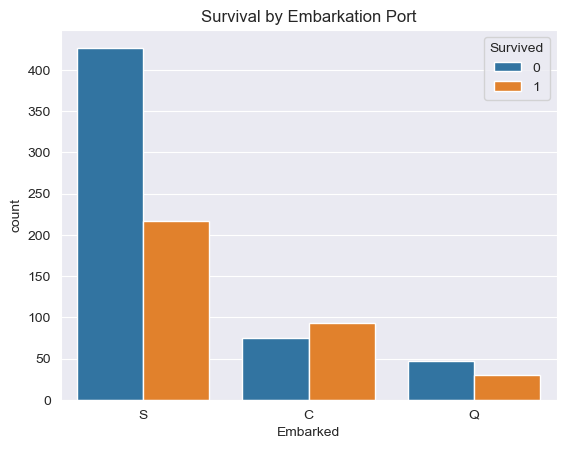

In [87]:
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarkation Port')
plt.show()

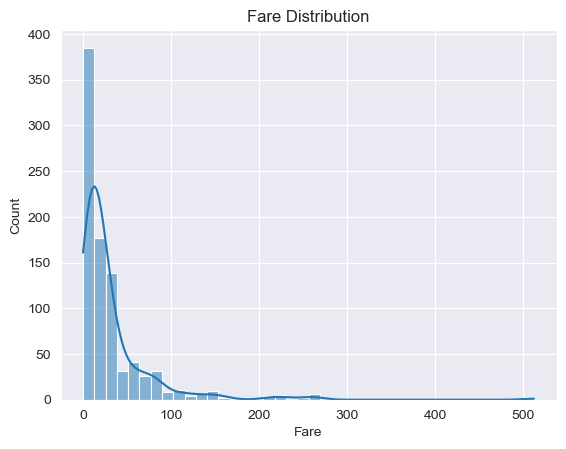

In [88]:
sns.histplot(data=train_df, x='Fare', bins=40, kde=True)
plt.title('Fare Distribution')
plt.show()

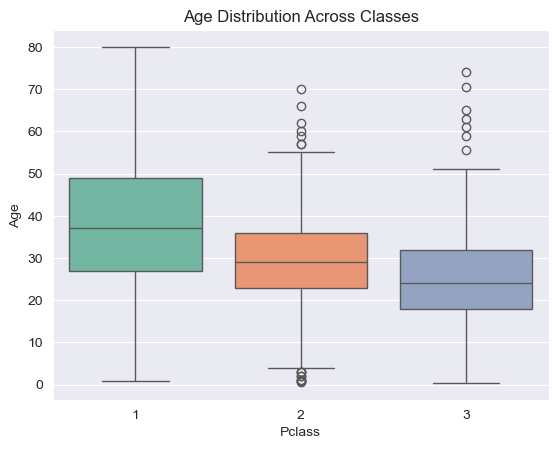

In [89]:
sns.boxplot(data=train_df, x='Pclass', y='Age', palette='Set2')
plt.title('Age Distribution Across Classes')
plt.show()

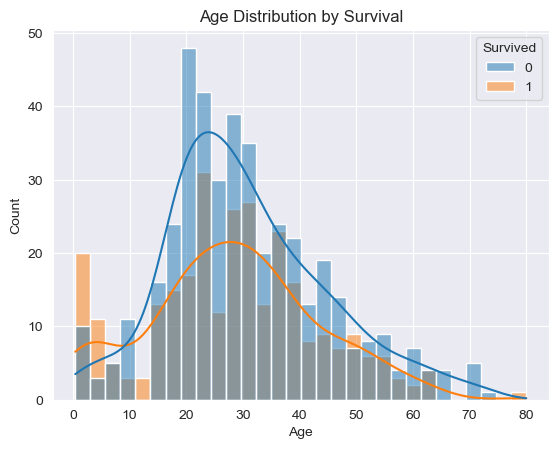

In [90]:
sns.histplot(data=train_df, x='Age', bins=30, hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

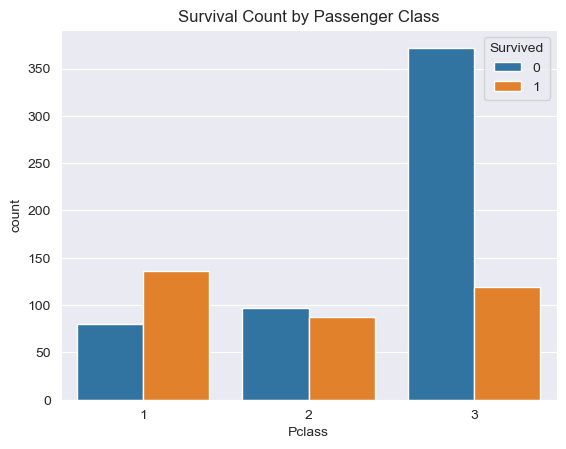

In [91]:
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.show()

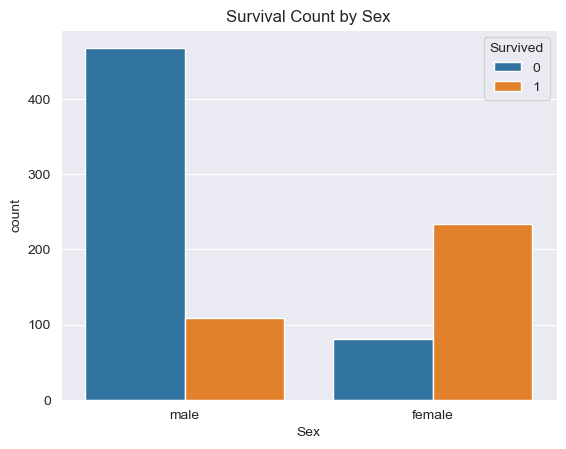

In [92]:
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

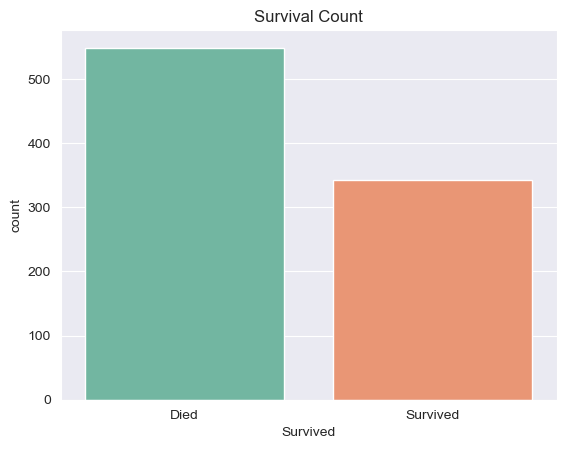

In [93]:
sns.countplot(x='Survived', data=train_df, palette='Set2')
plt.title('Survival Count')
plt.xticks([0,1], ['Died', 'Survived'])
plt.show()

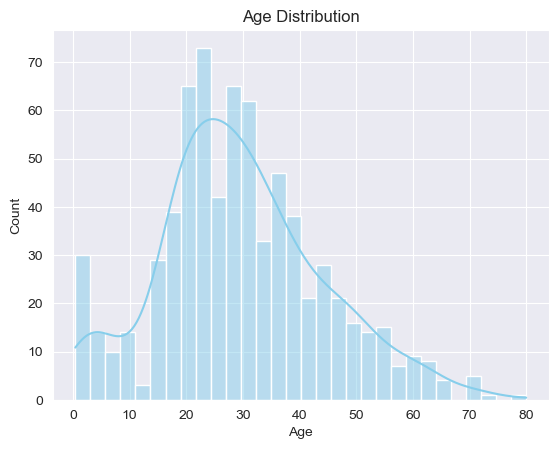

In [94]:
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

<Axes: >

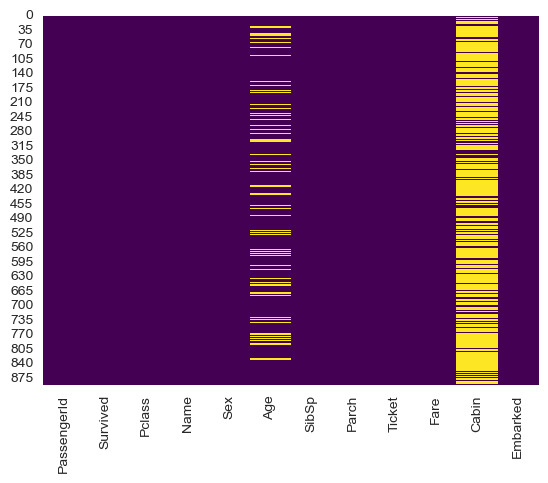

In [95]:
#Visualizing the missing values
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')

In [96]:
# Here I droped the Cabin column becaus of so much outliers
train_df.drop('Cabin', axis=1, inplace=True)

In [97]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

<Axes: >

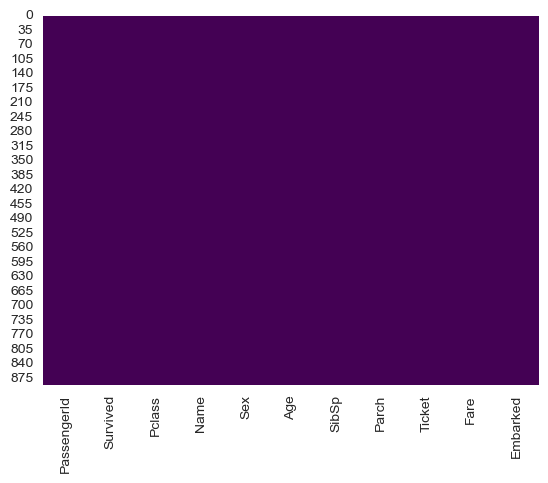

In [98]:
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')

In [99]:
# Now All the Outliers are removed and handeled

In [100]:
# Understanding the datatypes
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [101]:
# Converting object to categorical datatype
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')

In [102]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

# Encoding

In [103]:
#One Hot Encoding

In [104]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [105]:
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,False,True


In [106]:
# Extracted the title (like Mr, Mrs, Miss, etc.)
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [107]:
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [108]:
# Converting tital to category
train_df['Title'] = train_df['Title'].astype('category')
train_df = pd.get_dummies(train_df, columns=['Title'], drop_first=True)

In [109]:
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('Ticket', axis=1, inplace=True)

In [110]:
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,1,38.0,1,0,71.2833,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
3,4,1,35.0,1,0,53.1000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,5,0,35.0,0,0,8.0500,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [111]:
#Here I converted all the boolean values into 0 & 1 (integer) better model building

train_df = train_df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

In [112]:
train_df.dtypes

PassengerId         int64
Survived            int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Sex_male            int64
Embarked_Q          int64
Embarked_S          int64
Pclass_2            int64
Pclass_3            int64
Title_Col           int64
Title_Countess      int64
Title_Don           int64
Title_Dr            int64
Title_Jonkheer      int64
Title_Lady          int64
Title_Major         int64
Title_Master        int64
Title_Miss          int64
Title_Mlle          int64
Title_Mme           int64
Title_Mr            int64
Title_Mrs           int64
Title_Ms            int64
Title_Rev           int64
Title_Sir           int64
dtype: object

In [113]:
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
